In [3]:
from benches.bench import bench_line_item

num_messages = 10000
trials = [
    ("localhost", 28815, "username", num_messages)
]
all_results = []
for t in trials:
    all_results.extend(
        bench_line_item(t[0], t[1], t[2], t[3])
    )


    Starting benchmark
    Total messages: 10000
    
Writing Messages
Reading Messages
read 0 messages
read 100 messages
read 200 messages
read 300 messages
read 400 messages
read 500 messages
read 600 messages
read 700 messages
read 800 messages
read 900 messages
read 1000 messages
read 1100 messages
read 1200 messages
read 1300 messages
read 1400 messages
read 1500 messages
read 1600 messages
read 1700 messages
read 1800 messages
read 1900 messages
read 2000 messages
read 2100 messages
read 2200 messages
read 2300 messages
read 2400 messages
read 2500 messages
read 2600 messages
read 2700 messages
read 2800 messages
read 2900 messages
read 3000 messages
read 3100 messages
read 3200 messages
read 3300 messages
read 3400 messages
read 3500 messages
read 3600 messages
read 3700 messages
read 3800 messages
read 3900 messages
read 4000 messages
read 4100 messages
read 4200 messages
read 4300 messages
read 4400 messages
read 4500 messages
read 4600 messages
read 4700 messages
read 4800 m

# Operation in Boxplot

Text(0.5, 1.0, 'N = 10000')

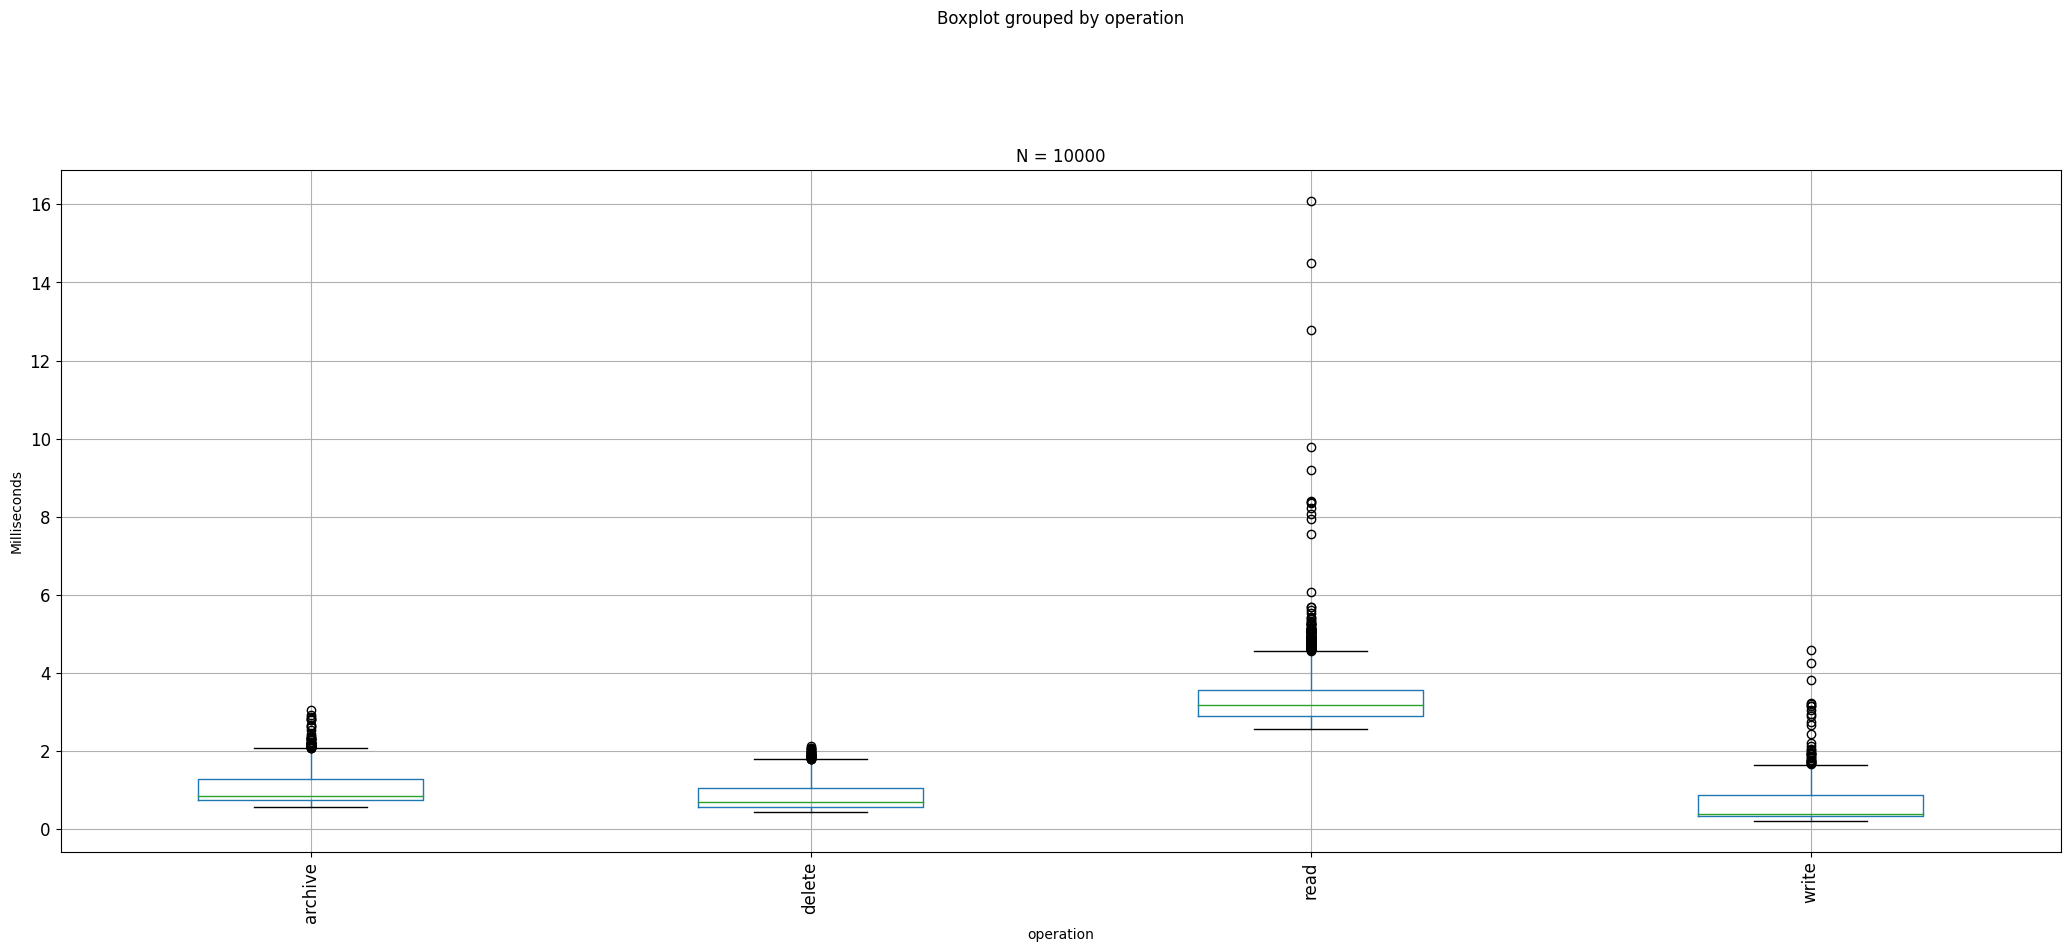

In [4]:
import pandas as pd

df = pd.DataFrame(all_results)
# convert seconds to milliseconds
df["duration"] = df["duration"] * 1000
bbplot = df.boxplot(column="duration",
                    by="operation",
                    fontsize=12,
                    layout=(2,1),
                    rot=90,
                    figsize=(25,20),
                    return_type='axes')

bbplot[0].set_ylabel('Milliseconds')
bbplot[0].set_title(f'N = {num_messages}')


# Bar Charts

In [20]:
df.groupby("operation")["duration"].describe()

,count,mean,std,min,25%,50%,75%,max
operation,,,,,,,,
archive,10000.0,1.009986,0.349508,0.566006,0.757933,0.856876,1.291037,3.047943
delete,10000.0,0.817916,0.315926,0.440121,0.574827,0.704050,1.062930,2.117872
read,10000.0,3.281079,0.539867,2.576113,2.892017,3.168106,3.563941,16.088009
write,10000.0,0.563529,0.332056,0.216961,0.339270,0.396013,0.867903,4.591942


Text(0, 0.5, 'Milliseconds')

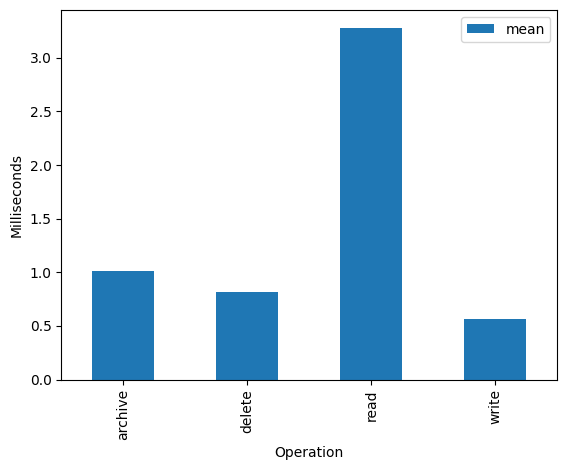

In [21]:
bar = df.groupby("operation")["duration"].describe()[["mean"]].plot(kind="bar")
bar.set_xlabel("Operation")
bar.set_ylabel("Milliseconds")